# Projet 2024 d'Informatique appliquée à la finance, M1 Economie et Finance

# **Partie 1**

## Estimation et test du modèle à 5 facteurs de Fama French (2014)

## I. Les 5 facteurs de Fama-French

#### 1. Importation des données 

Les données des facteurs de 5 facteurs de Fama-French sont stockées dans le fichier "F-F_Research_Data_5_Factors_2x3.csv". 

1. Importez les observations mensuelles de ces facteurs à partir de "1963-07-01".
2. Vérifiez l'existence de variables manquantes
3. Après des transformations appropriées, la date deviendra l'indice des données. 
4. Construire un dataframe spécifique pour le taux sans risque.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io


#Importation du fichier avec les données
file_path = "F-F_Research_Data_5_Factors_2x3.csv"
data = pd.read_csv(file_path,skiprows=3) 
data.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27
1,196308,5.07,-0.80,1.80,0.36,-0.35,0.25
2,196309,-1.57,-0.52,0.13,-0.71,0.29,0.27
3,196310,2.53,-1.39,-0.10,2.80,-2.01,0.29
4,196311,-0.85,-0.88,1.75,-0.51,2.24,0.27


In [157]:
# On renomme les colonnes pour simplifier le code par la suite
data.columns = ["Date", "Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]

# On supprime les lignes où la date est manquante
data = data.dropna(subset=["Date"])
# On supprime les lignes non numériques dans la colonne "Date"
data = data[pd.to_numeric(data['Date'], errors='coerce').notnull()]

In [159]:
#On conserve juste les données mensuelles du fichier
datam = data.iloc[:723]

#On convertit les dates au format datetime et on filtre les observations
try:
    datam["Date"] = pd.to_datetime(datam["Date"], format="%Y%m", errors='coerce')
    datam = datam[(datam["Date"] >= "1963-07-01")] #on importe les données à partir de la date "1963-07-01"
    datam.set_index("Date", inplace=True) #on met la colonne Date comme indice des données
except Exception as e:
    raise ValueError("Erreur de conversion de date : assurez-vous que le format est correct.") from e

/var/folders/x4/vcj0d54d5qqb95djc7235tmw0000gn/T/ipykernel_51216/2100656117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datam["Date"] = pd.to_datetime(datam["Date"], format="%Y%m", errors='coerce')


#### 2. Vérification de l'existence de variables manquantes

Vérifiez l'existence de variables manquantes

In [161]:
# Vérification des valeurs manquantes
missing_values = datam.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64


#### 3. Formatage des dates + Taux sans risque

1. Transformez les dates en indice du dataframe
2. Stockez le taux sans risque RF dans un dataframe spécifique

In [163]:
# On construit un DataFrame spécifique pour le taux sans risque
rf_dataframe = datam[["RF"]]
rf_dataframe.index = datam.index  # Aligner les dates (déjà présentes dans le dataframe datam.index)
print("\nAperçu du DataFrame du taux sans risque aligné avec les dates :\n", rf_dataframe)


Aperçu du DataFrame du taux sans risque aligné avec les dates :
                   RF
Date                
1963-07-01      0.27
1963-08-01      0.25
1963-09-01      0.27
1963-10-01      0.29
1963-11-01      0.27
...              ...
2023-05-01      0.36
2023-06-01      0.40
2023-07-01      0.45
2023-08-01      0.45
2023-09-01      0.43

[723 rows x 1 columns]


In [165]:
# On convertit toutes les colonnes de facteurs en valeurs numériques pour le graphique et les statistiques
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]
datam[factors] = datam[factors].apply(pd.to_numeric, errors="coerce")
data[factors]=data[factors].apply(pd.to_numeric, errors="coerce") #on convertit aussi pour tout l'échantillon pour pouvoir calculer les statistiques


#### 4. Représentation graphique des facteurs

Faites la représentation graphique des facteurs 

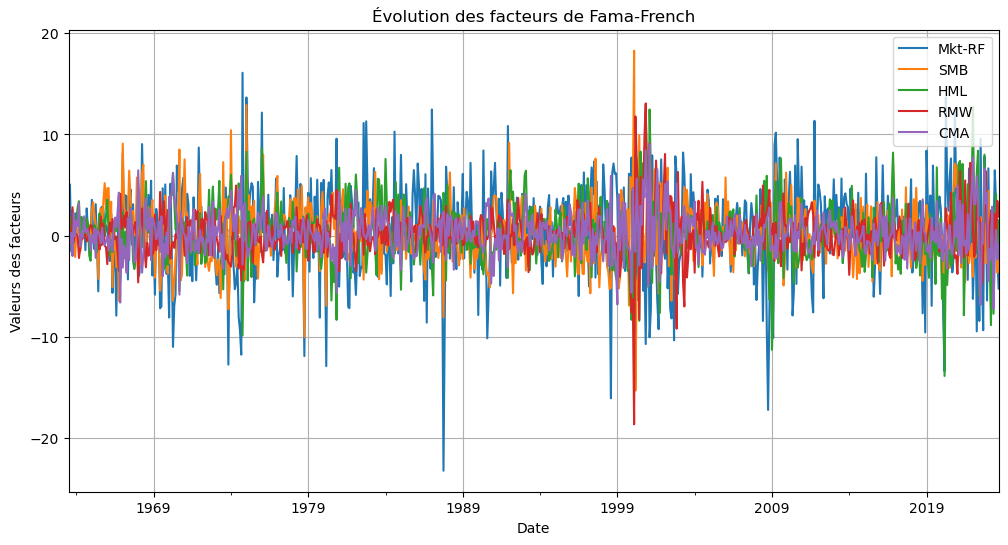

In [167]:
# Représentation graphique des facteurs
datam[factors].plot(figsize=(12, 6))
plt.title("Évolution des facteurs de Fama-French")
plt.xlabel("Date")
plt.ylabel("Valeurs des facteurs")
plt.legend(loc="upper right")
plt.grid()
plt.show()


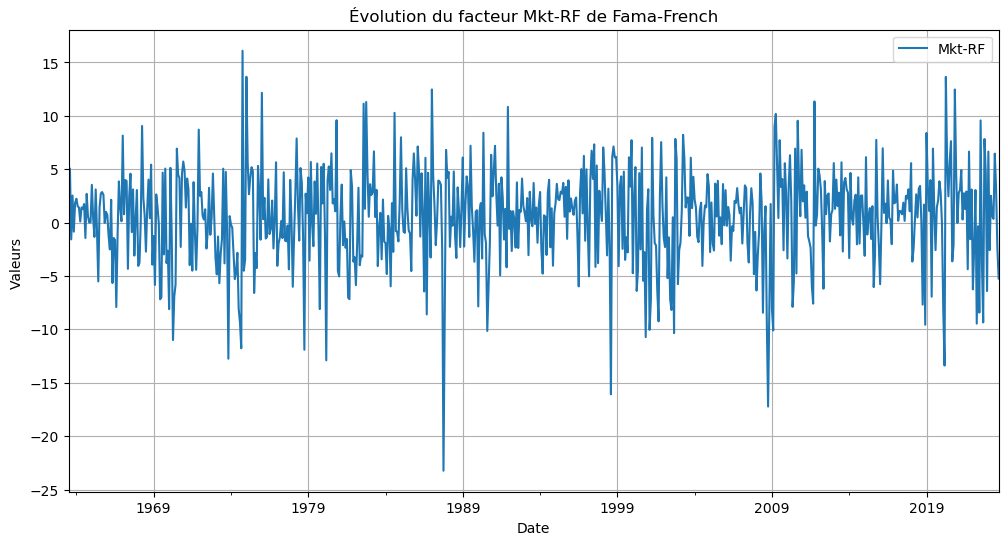

In [169]:
#Représenation graphique par facteur
#pour le facteur "MKT-RF"
datam["Mkt-RF"].plot(figsize=(12, 6))
plt.title("Évolution du facteur Mkt-RF de Fama-French")
plt.xlabel("Date")
plt.ylabel("Valeurs ")
plt.legend(loc="upper right")
plt.grid()
plt.show()

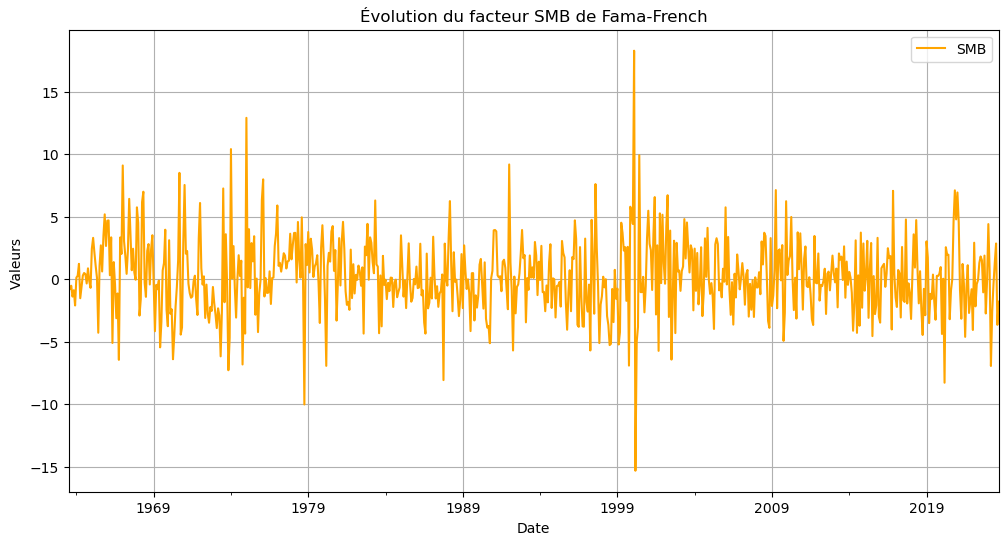

In [171]:
#pour le facteur "SMB"
datam["SMB"].plot(figsize=(12, 6), color='orange')
plt.title("Évolution du facteur SMB de Fama-French")
plt.xlabel("Date")
plt.ylabel("Valeurs ")
plt.legend(loc="upper right")
plt.grid()
plt.show()

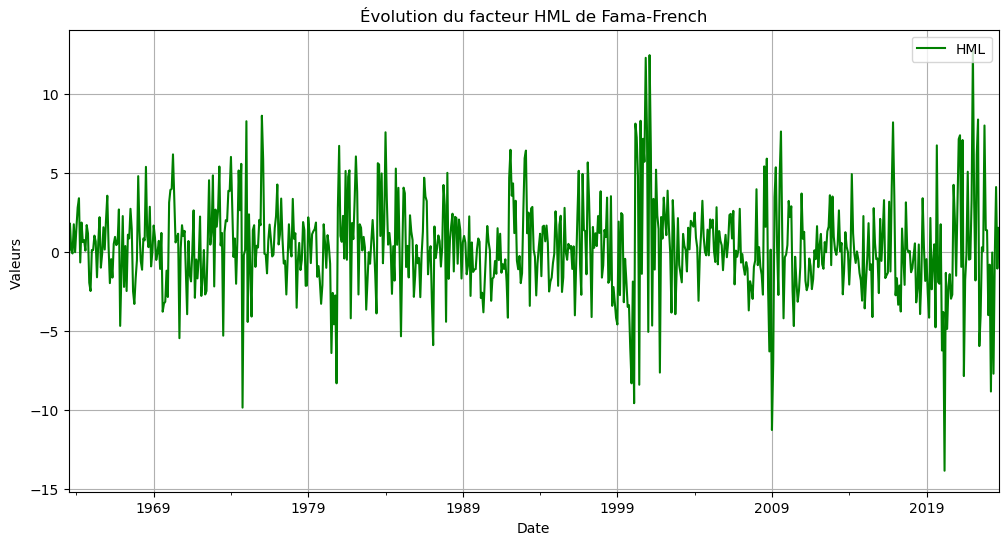

In [173]:
#pour le facteur "HML"
datam["HML"].plot(figsize=(12, 6), color='green')
plt.title("Évolution du facteur HML de Fama-French")
plt.xlabel("Date")
plt.ylabel("Valeurs ")
plt.legend(loc="upper right")
plt.grid()
plt.show()

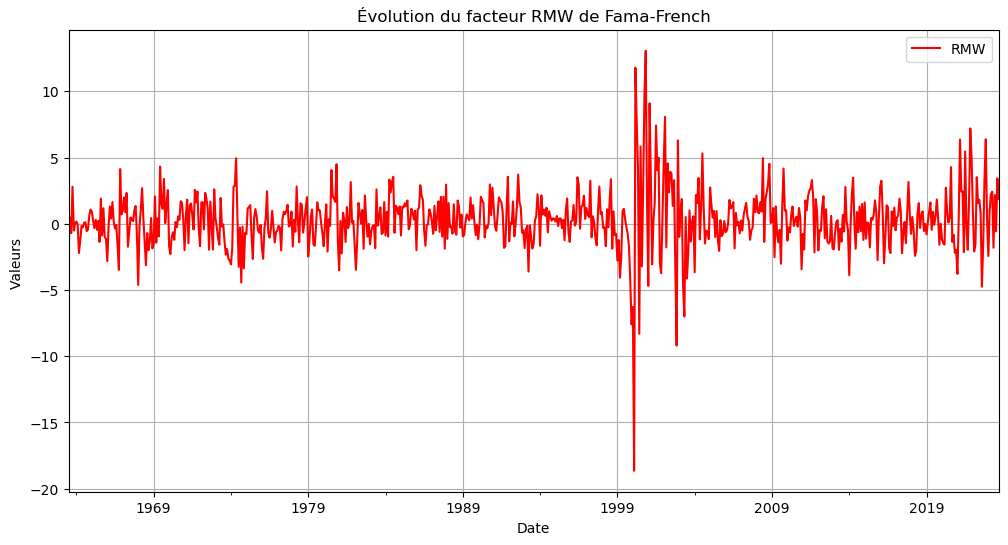

In [175]:
#pour le facteur "RMW"
datam["RMW"].plot(figsize=(12, 6), color='red')
plt.title("Évolution du facteur RMW de Fama-French")
plt.xlabel("Date")
plt.ylabel("Valeurs ")
plt.legend(loc="upper right")
plt.grid()
plt.show()

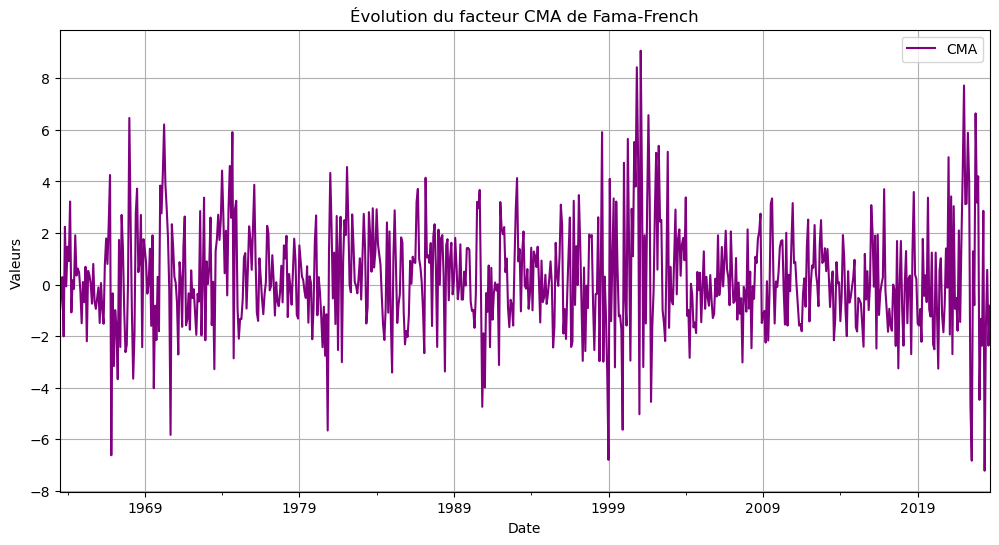

In [177]:
#pour le facteur "CMA"
datam["CMA"].plot(figsize=(12, 6), color='purple')
plt.title("Évolution du facteur CMA de Fama-French")
plt.xlabel("Date")
plt.ylabel("Valeurs ")
plt.legend(loc="upper right")
plt.grid()
plt.show()

Après avoir complété les parties 1,2,3 et 4 de la partie "les 5 facteurs Fama-French", nous allons ensuite prendre un échantillon plus grand, comprenant les dates mensuelles et annuelles pour faire les calculs statistiques de chaque facteur du modèle Fama-French.


#### 5. Statistiques descriptives

Calculez la moyenne, le maximum, le minimum, l'écart-type, le skewness, le kurtosis pour chaque facteur

    - pour la totalité de l'échantillon
    - par année
    - par mois

In [253]:
#1)pour la totalité de l'échantillon
# en utilisant la commande describe, on a pour chaque facteur les statistiques le nombre de valeurs non manquantes (count), la moyenne (mean), l'écart-type(std), le minimum, le maximum et les quantiles
stats= data[factors].describe().T.drop(['count','25%', '50%', '75%'], axis=1) #on ne cherche que la moyenne, l'écart-type, le min et le max
stats["skewness"] = data[factors].skew() #pour calculer le skewness
stats["kurtosis"] = data[factors].kurtosis() #pour calculer le kurtosis
print("\nStatistiques descriptives pour l'ensemble des facteurs du modèle Fama-French sur la totalité de l'échantillon:\n", stats)


Statistiques descriptives pour l'ensemble des facteurs du modèle Fama-French sur la totalité de l'échantillon:
             mean       std    min    max  skewness   kurtosis
Mkt-RF  1.050524  6.722234 -38.34  35.20  0.360149   7.055259
SMB     0.432609  4.742781 -28.03  50.51  2.213428  22.590163
HML     0.564808  5.286577 -46.67  44.98  0.462577  20.286123
RMW     0.535895  3.481824 -28.04  26.69  0.746974  18.635884
CMA     0.537379  3.523488 -15.31  30.71  2.284575  16.663569


In [182]:
#2)par année
data_annee=data.iloc[724:] # on ajuste le données pour n'avoir que les données annuelles (il faut prendre en compte les lignes que le code a supprimé pour les dates mensuelles)
stats = data_annee[factors].describe().T.drop(['count','25%', '50%', '75%'], axis=1)
stats["skewness"] = data_annee[factors].skew()
stats["kurtosis"] = data_annee[factors].kurtosis()
print("\nStatistiques descriptives pour l'ensemble des facteurs du modèle Fama-French par année:\n", stats)


Statistiques descriptives pour l'ensemble des facteurs du modèle Fama-French par année:
             mean        std    min    max  skewness  kurtosis
Mkt-RF  7.018276  17.944773 -38.34  35.20 -0.638353 -0.290229
SMB     3.192069  13.566593 -28.03  50.51  0.681775  1.532457
HML     3.912759  15.981170 -46.67  44.98 -0.409100  1.028665
RMW     3.659828   9.630540 -28.04  26.69 -0.445874  1.764988
CMA     3.707241  10.173395 -15.31  30.71  0.352403 -0.127986


In [184]:
#3)par mois
#datam a été défini précedemment comme étant une variable qui ne comprend que les données mensuelles
stats = datam[factors].describe().T.drop(['count','25%', '50%', '75%'], axis=1)
stats["skewness"] = datam[factors].skew()
stats["kurtosis"] = datam[factors].kurtosis()
print("\nStatistiques descriptives pour l'ensemble des facteurs du modèle Fama-French par mois:\n", stats)


Statistiques descriptives pour l'ensemble des facteurs du modèle Fama-French par mois:
             mean       std    min    max  skewness   kurtosis
Mkt-RF  0.555892  4.491112 -23.24  16.10 -0.498720   1.750642
SMB     0.211189  3.023388 -15.32  18.28  0.331051   3.064658
HML     0.283568  2.995500 -13.87  12.75  0.075378   2.310209
RMW     0.290650  2.219599 -18.65  13.07 -0.272724  11.109858
CMA     0.274329  2.080042  -7.22   9.07  0.263320   1.460852


#### 6. Matrice de correlation
1. Estimez la matrice de corrélation des facteurs et commentez
2. Faites une représentation graphique de cette matrice
3. Vérifiez la significativité de la corrélation entre les facteurs $HML$ et $SMB$

In [188]:
#estimation de la matrice de corrélations
correlation_matrice = data[factors].corr()
print("\nVoici la matrice de corrélation :\n", correlation_matrice)


Voici la matrice de corrélation :
           Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.273000 -0.187377 -0.120203 -0.283857
SMB     0.273000  1.000000  0.089663 -0.191311  0.000013
HML    -0.187377  0.089663  1.000000  0.183521  0.754172
RMW    -0.120203 -0.191311  0.183521  1.000000  0.042228
CMA    -0.283857  0.000013  0.754172  0.042228  1.000000


**Commentaire sur la matrice de corrélation:**
Tout d'abord, la diagonale des 1 montre que chaque facteur est parfaitement corrélé avec lui meme.
Par ailleurs, on remarque qu'il y a des corrélations positives entre les facteurs. En effet, on peut dire que MKT-RF n'a qu'une corrélation positive avec les autres facteurs, avec le facteur SMB. La corrélation positive entre CMA et HML est néanmoins tres élevée. Il y a également des corrélations négatives plus ou moins importantes comme celle entre RMW et MKT-RF,qui montre que les mouvements du marché global ont tendance à être opposés aux comportements capturés par RMW.
Ainsi, la matrice de corrélation confirme que les facteurs sont globalement complémentaires, avec des corrélations faibles à modérées entre la plupart d’entre eux. Toutefois, des relations fortes, comme entre HML et CMA, méritent une attention particulière pour éviter de possibles problèmes de multicolinéarité dans des modèles statistiques.

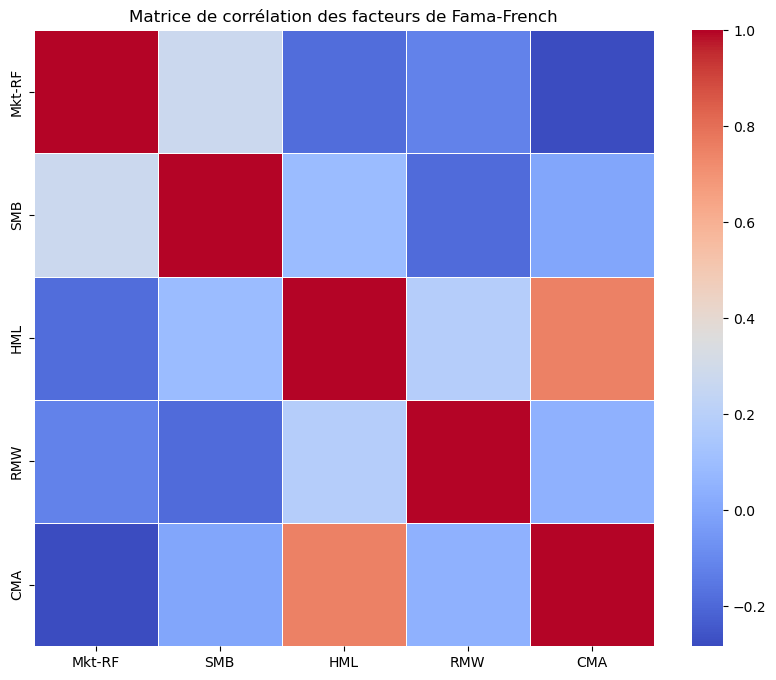

In [191]:
# Représentation graphique de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrice, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des facteurs de Fama-French")
plt.show()


In [193]:
from scipy.stats import pearsonr

# Test de significativité pour la corrélation entre HML et SMB

coef_correlation, p_value = pearsonr(data["HML"], data["SMB"])
print(f"\nLa corrélation entre HML et SMB : {coef_correlation:.2f}, p-valeur : {p_value:.3f}") #on prend deux decimales pour le coefficient de corrélation entre HML et SMB et 3 décimales pour la p-value
if p_value < 0.05: #on prend un seuil de 5% car c'est le cas le plus général
    print("La corrélation entre HML et SMB est bien significative.")
else:
    print("La corrélation entre HML et SMB n'est pas statistiquement significative.")

coef_correlation, p_value = pearsonr(datam["HML"], datam["SMB"])
print(f"\nLa corrélation entre HML et SMB sur les données mensuelles : {coef_correlation:.2f}, p-valeur : {p_value:.3f}") #on prend deux decimales pour le coefficient de corrélation entre HML et SMB et 3 décimales pour la p-value
if p_value < 0.05: #on prend un seuil de 5% car c'est le cas le plus général
    print("La corrélation entre HML et SMB est bien significative.")
else:
    print("La corrélation entre HML et SMB n'est pas statistiquement significative.")


La corrélation entre HML et SMB : 0.09, p-valeur : 0.012
La corrélation entre HML et SMB est bien significative.

La corrélation entre HML et SMB sur les données mensuelles : -0.01, p-valeur : 0.693
La corrélation entre HML et SMB n'est pas statistiquement significative.


Ainsi, nous constatons que la corrélation entre HML et SMB n'est pas forcément la même en fonction des données. En effet, la corrélation entre ces deux facteurs est bien significative pour tout l'échantillon alors que celle-ci ne l'est pas quand on considère les données mensuelles uniquement.

Nous allons dès à présent commencer la deuxième partie: L'analyse des 25 portefeuilles formés à partir de B/M et OP.

## II. Les 25 portefeuilles formés à partir de B/M et OP

On importe les rendements de 25 portefeuilles formés à partir des titres du NYSE, de l'AMEX, du NASDAQ pour lesquels on dispose de toutes les quotations. 
Ces actions sont réparties en 25 portefeuilles obtenus par le croisement du ratio *B/M*:
- divisé en 5 catégories LoBM ou BM1/BM2/BM3/BM4/HiBM ou BM5

et de l'Operating Profitability: 
 
- divisé en 5 catégories LoOP ou OP1/OP2/OP3/OP4/HiOP ou OP5

Ces données se trouvent dans le fichier "25_Portfolios_BEME_OP_5x5.CSV"

#### 1. Importation des données

1. Importez les données
2. Transformez les dates au format yyyy-mm-01 (exemple 196307 devient 1963-07-01)
3. Transformez les dates en indices
4. Sélectionnez les observations à partir de "1963-07-01"

##### 1) Importation des données: #####

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io

#importer le fichier où il y a les données
filepath ='25_Portfolios_BEME_OP_5x5_Wout_Div.CSV'
data_p = pd.read_csv(filepath, encoding='ISO-8859-1',skiprows=21, nrows=723)
data_p.head()

,Unnamed: 0,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
0,196307,1.2623,2.3561,0.0607,-1.3786,0.5664,0.9993,1.1767,0.0873,-0.5648,...,-1.9017,-0.6962,-5.3396,0.8350,2.2712,-2.0831,1.3898,2.7043,-2.6274,-1.4786
1,196308,5.8711,1.9047,6.0121,5.2857,5.3890,0.9254,3.1166,3.9449,4.8578,...,7.1559,5.9545,14.9653,3.8425,11.8604,5.1897,4.7552,2.5373,6.3988,3.3189
2,196309,-5.0591,-4.6978,1.3522,-2.0855,-1.2833,-2.1914,-3.4784,0.4944,-2.7454,...,-1.6790,-0.5462,3.6673,-1.4547,-8.5726,-2.9201,-4.8250,-1.0572,-0.4710,-3.3070
3,196310,-2.4794,-3.7541,0.7433,3.8618,7.2150,-0.5754,1.8540,2.4607,-0.9950,...,2.6678,0.1624,9.8256,6.1852,18.6751,1.1568,1.2259,2.0655,-3.0212,8.2982
4,196311,-3.1730,-0.8676,-1.5319,0.5807,-3.6904,-5.8194,-0.4104,1.5279,-1.1904,...,-0.2609,-2.3525,-5.0123,0.6559,5.1434,0.5268,-2.5245,-1.6689,-0.4706,-3.1219


In [198]:
# Renommer la colonne des dates
data_p.rename(columns={data_p.columns[0]: "Date"}, inplace=True)

#Format des dates et les transformer en indice
try:
    data_p["Date"] = pd.to_datetime(data_p["Date"], format="%Y%m", errors='coerce')
    data_p = data_p[(data_p["Date"] >= "1963-07-01")]
    data_p.set_index("Date", inplace=True)
except Exception as e:
    raise ValueError("Erreur de conversion de date : assurez-vous que le format est correct.") from e

# Affichage des premières lignes pour vérifier le résultat
print(data_p)

            LoBM LoOP  BM1 OP2  BM1 OP3  BM1 OP4  LoBM HiOP  BM2 OP1  BM2 OP2  \
Date                                                                            
1963-07-01     1.2623   2.3561   0.0607  -1.3786     0.5664   0.9993   1.1767   
1963-08-01     5.8711   1.9047   6.0121   5.2857     5.3890   0.9254   3.1166   
1963-09-01    -5.0591  -4.6978   1.3522  -2.0855    -1.2833  -2.1914  -3.4784   
1963-10-01    -2.4794  -3.7541   0.7433   3.8618     7.2150  -0.5754   1.8540   
1963-11-01    -3.1730  -0.8676  -1.5319   0.5807    -3.6904  -5.8194  -0.4104   
...               ...      ...      ...      ...        ...      ...      ...   
2023-05-01    10.0977   6.2492  -1.0759  12.7733     1.4655   9.0146  -2.0100   
2023-06-01     5.3849   7.4446   5.3773   8.7382     6.5803   3.2510   6.5592   
2023-07-01     4.9171   0.8839   2.3438   3.5863     1.4706   6.9145   1.8782   
2023-08-01    -5.8210  -1.4650   1.2550  -1.2892    -1.2077  -7.8681  -3.4998   
2023-09-01    -5.0326  -4.37

#### 2. Calculez les excès de rendements $R_{it} -RF_{t}$

In [203]:
# Assurez-vous que 'rf_dataframe' a un index correctement aligné
rf_dataframe = rf_dataframe.reindex(data_p.index)  # Aligner les indices de rf_dataframe sur data

# Convertir les colonnes de 'data' en numérique
data_p = data_p.apply(pd.to_numeric, errors='coerce')

# Convertir 'rf' dans 'rf_dataframe' en numérique
rf_dataframe['RF'] = pd.to_numeric(rf_dataframe['RF'], errors='coerce')

# Supprimer les lignes contenant des NaN après conversion
data_p = data_p.dropna()
rf_dataframe = rf_dataframe.dropna()

# Calcul des excès de rendements
excess_returns = data_p.subtract(rf_dataframe['RF'], axis=0)

# Affichage des premières lignes pour vérifier le résultat
print("\nVoici les premieres valeurs de rendement excedentaire:\n", excess_returns)


Voici les premieres valeurs de rendement excedentaire:
             LoBM LoOP  BM1 OP2  BM1 OP3  BM1 OP4  LoBM HiOP  BM2 OP1  BM2 OP2  \
Date                                                                            
1963-07-01     0.9923   2.0861  -0.2093  -1.6486     0.2964   0.7293   0.9067   
1963-08-01     5.6211   1.6547   5.7621   5.0357     5.1390   0.6754   2.8666   
1963-09-01    -5.3291  -4.9678   1.0822  -2.3555    -1.5533  -2.4614  -3.7484   
1963-10-01    -2.7694  -4.0441   0.4533   3.5718     6.9250  -0.8654   1.5640   
1963-11-01    -3.4430  -1.1376  -1.8019   0.3107    -3.9604  -6.0894  -0.6804   
...               ...      ...      ...      ...        ...      ...      ...   
2023-05-01     9.7377   5.8892  -1.4359  12.4133     1.1055   8.6546  -2.3700   
2023-06-01     4.9849   7.0446   4.9773   8.3382     6.1803   2.8510   6.1592   
2023-07-01     4.4671   0.4339   1.8938   3.1363     1.0206   6.4645   1.4282   
2023-08-01    -6.2710  -1.9150   0.8050  -1.7392    

#### 3. Calcul de statistiques descriptives

Calculez les rendements moyens pour chaque portefeuille. Que pouvez-vous dire de la relation entre le rendement moyen et 
- le *B/M* (*value effect*)  ?
- le *OP* (*profitability effect*) ?

In [240]:
# Exclude the 'Date' column (which is likely the first column) from the calculation
numerical_columns = data_p.select_dtypes(include=np.number).columns
moyennes={}
for col in numerical_columns:
    moyennes[col] = data_p[col].mean()

# Afficher les moyennes
print("\nVoici les moyennes de chaque portefeuille:\n" +
      "\n".join([f"{col}: {moyenne:.4f}" for col, moyenne in moyennes.items()]))


Voici les moyennes de chaque portefeuille:
Unnamed: 0: 199318.9544
LoBM LoOP: 0.4695
BM1 OP2: 0.8521
BM1 OP3: 0.7601
BM1 OP4: 0.7631
LoBM HiOP: 0.8124
BM2 OP1: 0.5575
BM2 OP2: 0.6515
BM2 OP3: 0.7554
BM2 OP4: 0.7488
BM2 OP5: 0.7599
BM3 OP1: 0.4600
BM3 OP2: 0.6439
BM3 OP3: 0.6860
BM3 OP4: 0.8730
BM3 OP5: 0.9599
BM4 OP1: 0.6012
BM4 OP2: 0.6373
BM4 OP3: 0.8078
BM4 OP4: 0.7917
BM4 OP5: 1.0759
HiBM LoOP: 0.8413
BM5 OP2: 0.8478
BM5 OP3: 0.9725
BM5 OP4: 1.0620
HiBM HiOP: 1.0294


**Que pouvez-vous dire de la relation entre le rendement moyen et le B/M (value effect) et le OP (profitability effect) ?**


*   Le Book-to-Market est représenté par les catégories LoBM (faible B/M) à HiBM (élevé B/M). Par exemple, le portefeuille LoBM LoOP a un rendement relativement faible (0,47), qui est inferieur à celui du portefeuille HiBM HiOP qui a un rendement moyen assez élevé (1,03). Cette tendance confirme l'effet value, où les titres avec des ratios B/M élevés offrent des rendements supérieurs par rapport aux titres avec des ratio
B/M faibles. Cela reflète la compensation pour un risque perçu plus élevé.

*   Operating Profitability, est représenté par les catégories LoOP (faible
OP) à HiOP (élevé OP). Les rendements augmentent généralement avec OP. Si on prend le meme exemple que pour le Book to Market,on confirme l'effet profitability, où des entreprises plus rentables (avec un OP élevé) génèrent des rendements supérieurs.

La combinaison des deux effets maximise le rendement, ce qui est conforme aux hypothèses des modèles multifactoriels comme celui de Fama-French.




Nous avons terminé la deuxième partie, nous allons donc commncer la troisieme qui porte sur l'estimation du modèle à facteurs:

## III. Estimation du modèle à facteurs

Pour chaque actif *i*, on dispose de T observations ${r_{i1},...,r_{iT}}$. On peut estimer les trois régressions suivantes : :
    
### Régression sur le facteur du marché
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+e_{it}$$

### Régression sur les 3 facteurs
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{t}+e_{it}$$

### Régression sur les 5 facteurs 
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{t}+r_{i}RMW_{t}+c_{i}CMA_{t}+e_{it}$$

- $R_{Ft}$ est le taux sans risque
- $R_{MT}$ est le taux de rendement du portefeuille du marché
- Le résidu $e_{it}$ représente le risque idiosyncratique (ou risque diversifiable) de chaque actif.
- $\beta_{i}, s_{i}, h_{i},r_{i}, c_{i}$ représentent les expositions à chacun des facteurs
- $\alpha_{i}$ est la constante. Selon la théorie des portefeuilles efficients, on s'attend à avoir $a_{i}=0$. Cette hypothèse peut aussi se justifier par la proposition que l'ensemble des facteurs représentent la totalité des facteurs de risque.

#### 1. Construisez une fonction permettant d'estimer ces trois régressions. Vous conserverez comme output :

1. les coefficients estimés
2. les tstat des coefficients estimés
3. les résidus des régressions
4. La moyenne des constantes en valeur absolue

In [210]:
import statsmodels.api as sm

In [212]:
def estimer_regressions(rendements_portef, rendements_factors):

    X_1 = sm.add_constant(rendements_factors[['MKT-RF']])  # Régression sur le facteur du marché
    X_2 = sm.add_constant(rendements_factors[['MKT-RF', 'SMB', 'HML']])  # Régression sur les 3 facteurs
    X_3 = sm.add_constant(rendements_factors[['MKT-RF', 'SMB', 'HML', 'RMW', 'CMA']])  # Régression sur les 5 facteurs

    results = {}
    for portef in rendements_portef.columns:
        # Régression sur le facteur du marché
        y = rendements_portef[portef] - rendements_factors['RF']  # l'équivalent de excess_returns
        model_1 = sm.OLS(y, X_1).fit()
        results[portef] = {
            'coefficients_1': model_1.params,
            'tstats_1': model_1.tvalues,
            'residus_1': model_1.resid
        }

        # Régression sur les 3 facteurs
        model_2 = sm.OLS(y, X_2).fit()
        results[portef].update({
            'coefficients_2': model_2.params,
            'tstats_2': model_2.tvalues,
            'residus_2': model_2.resid
        })
 # Régression sur les 5 facteurs
        model_3 = sm.OLS(y, X_3).fit()
        results[portef].update({
            'coefficients_3': model_3.params,
            'tstats_3': model_3.tvalues,
            'residus_3': model_3.resid
        })

    # Calcul de la moyenne des constantes en valeur absolue
    moyenne_constantes = np.mean([abs(results[portef]['coefficients_1']['const']) for portef in rendements_portef.columns])

    return results, moyenne_constantes

# Rendements des portefeuilles
rendements_portef = pd.DataFrame(data_p, index=data_p.index)  # On exclu la premiere colonne qui est celle des dates
rendements_portef.columns = [f'portef{i+1}' for i in range(len(rendements_portef.columns))]

# Conversion de toutes les colonnes dans 'rendements_portef' au format numérique
for col in rendements_portef.columns:
    rendements_portef[col] = pd.to_numeric(rendements_portef[col], errors='coerce')
    
# Rendements des facteurs (RMT, SMB, HML, RMW, CMA, RF)
rendements_factors = pd.DataFrame({
    'MKT-RF': datam['Mkt-RF'],
    'SMB': datam['SMB'],
    'HML': datam['HML'],
    'RMW': datam['RMW'],
    'CMA': datam['CMA'],
    'RF': datam['RF']
})

# Conversion de 'RF' dans 'rendements_factors' au fromat numérique
rendements_factors['RF'] = pd.to_numeric(rendements_factors['RF'], errors='coerce')

# Appeler la fonction
resultats, moyenne_constantes = estimer_regressions(rendements_portef, rendements_factors)

# Matrice pour la régression sur le marché (MKT-RF)
matrice_marche = pd.concat(
    {
        'Coefficient': pd.DataFrame({portef: result['coefficients_1'] for portef, result in resultats.items()}),
        'T-statistique': pd.DataFrame({portef: result['tstats_1'] for portef, result in resultats.items()}),
        'Résidus': pd.DataFrame({portef: result['residus_1'] for portef, result in resultats.items()}),
    }
)

print("Matrice pour la régression sur le marché :\n")
print(matrice_marche)

# Matrice pour la régression sur les 3 facteurs (MKT-RF, SMB, HML)
matrice_3_facteurs = pd.concat(
    {
        'Coefficient': pd.DataFrame({portef: result['coefficients_2'] for portef, result in resultats.items()}),
        'T-statistique': pd.DataFrame({portef: result['tstats_2'] for portef, result in resultats.items()}),
        'Résidus': pd.DataFrame({portef: result['residus_2'] for portef, result in resultats.items()}),
    }
)
print("\nMatrice pour la régression sur les 3 facteurs :\n")
print(matrice_3_facteurs)

# Matrice pour la régression sur les 5 facteurs (MKT-RF, SMB, HML, RMW, CMA)
matrice_5_facteurs = pd.concat(
    {
        'Coefficient': pd.DataFrame({portef: result['coefficients_3'] for portef, result in resultats.items()}),
        'T-statistique': pd.DataFrame({portef: result['tstats_3'] for portef, result in resultats.items()}),
        'Résidus': pd.DataFrame({portef: result['residus_3'] for portef, result in resultats.items()}),
    }
)
print("\nMatrice pour la régression sur les 5 facteurs :\n")
print(matrice_5_facteurs)


Matrice pour la régression sur le marché :

                                     portef1    portef2    portef3    portef4  \
Coefficient   const                -0.693197  -0.218965  -0.233314  -0.172260   
              MKT-RF                1.439724   1.274860   1.135228   1.030811   
T-statistique const                -3.854788  -1.595828  -2.100726  -2.209071   
              MKT-RF               36.206167  42.017812  46.224406  59.780998   
Résidus       1963-07-01 00:00:00   2.246989   2.802260   0.466753  -1.074324   
...                                      ...        ...        ...        ...   
              2023-05-01 00:00:00   9.926994   5.661964  -1.599916  12.224776   
              2023-06-01 00:00:00  -3.622521  -0.972029  -2.122956   1.851423   
              2023-07-01 00:00:00   0.538782  -3.439435  -1.516967  -0.000342   
              2023-08-01 00:00:00  -2.136862   1.350880   3.751508   0.896698   
              2023-09-01 00:00:00   2.774752   2.098130  -1.57409

#### 2. Commentaires des estimations 
1. Calculez et donnez les noms des portefeuilles pour lesquels le coefficients du rendement du portefeuille du marché est

- supérieur à 1
- égal à 1
- inférieur à 1

2. Pour chacun des facteurs HML, SMB et CMA, donnez :
    
- le nombre d'actifs pour lesquels chacun des facteurs pris un à un n'est pas significatif
- les noms des portefeuilles concernés

Quels facteurs vous paraissent ne pas avoir un pouvoir explicatif dans les variations des rendements ?

Portefeuilles avec β > 1 : ['portef1', 'portef2', 'portef3', 'portef4', 'portef6', 'portef7', 'portef11', 'portef15', 'portef20', 'portef21', 'portef25']
Portefeuilles avec β = 1 : []
Portefeuilles avec β < 1 : ['portef5', 'portef8', 'portef9', 'portef10', 'portef12', 'portef13', 'portef14', 'portef16', 'portef17', 'portef18', 'portef19', 'portef22', 'portef23', 'portef24']
Portefeuilles où le facteur HML n'est pas significatif : ['portef7']
Nombre total : 1
Portefeuilles où le facteur SMB n'est pas significatif : ['portef7', 'portef8', 'portef10', 'portef12', 'portef13', 'portef14']
Nombre total : 6
Portefeuilles où le facteur CMA n'est pas significatif : ['portef2', 'portef3', 'portef5', 'portef6', 'portef10', 'portef11', 'portef14', 'portef16', 'portef18', 'portef19', 'portef21', 'portef24', 'portef25']
Nombre total : 13


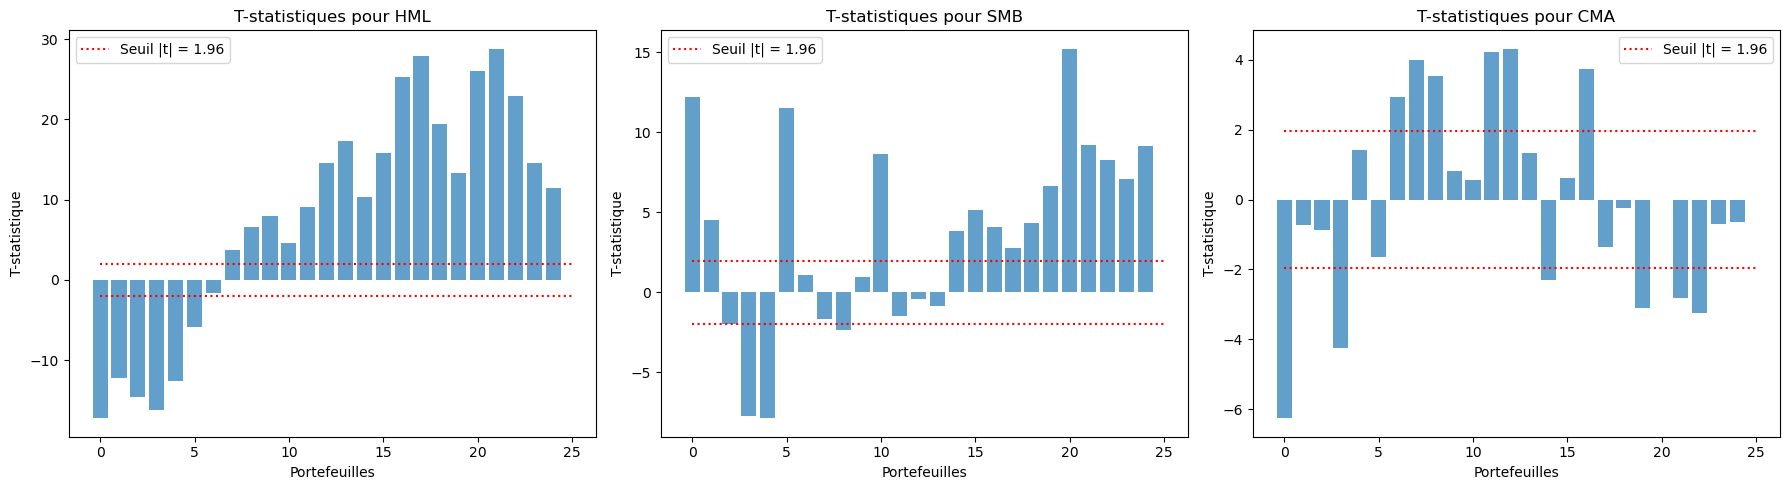

In [216]:
#Calcule des noms des portefeuilles en fonction du coefficient du rendement de marché
superieur_1 = []
egal_1 = []
inferieur_1 = []

for actif, result in resultats.items():
    beta = result['coefficients_1']['MKT-RF']
    if beta > 1:
        superieur_1.append(actif)
    elif beta == 1:
        egal_1.append(actif)
    else:
        inferieur_1.append(actif)

print("Portefeuilles avec β > 1 :", superieur_1)
print("Portefeuilles avec β = 1 :", egal_1)
print("Portefeuilles avec β < 1 :", inferieur_1)

#Pour chacun des facteurs HML, SMB et CMA: le nombre d'actifs pour lesquels chacun des facteurs pris un à un n'est pas significatif et les noms des portefeuilles concernés
# Définir le seuil de significativité
t_stat_seuil = 1.96  # Pour un niveau de confiance de 95 %

# Dictionnaires pour stocker les portefeuilles non significatifs pour chaque facteur
facteurs_non_significatifs = {
    'HML': [],
    'SMB': [],
    'CMA': []
}

for portef, result in resultats.items():
    # Vérifier HML dans la régression à 3 facteurs
    t_stat_hml = result['tstats_2']['HML']
    if abs(t_stat_hml) < t_stat_seuil:
        facteurs_non_significatifs['HML'].append(portef)

    # Vérifier SMB dans la régression à 3 facteurs
    t_stat_smb = result['tstats_2']['SMB']
    if abs(t_stat_smb) < t_stat_seuil:
        facteurs_non_significatifs['SMB'].append(portef)

    # Vérifier CMA dans la régression à 5 facteurs
    t_stat_cma = result['tstats_3']['CMA']
    if abs(t_stat_cma) < t_stat_seuil:
        facteurs_non_significatifs['CMA'].append(portef)

# on affiche les résultats
for facteur, portef in facteurs_non_significatifs.items():
    print(f"Portefeuilles où le facteur {facteur} n'est pas significatif :", portef)
    print(f"Nombre total : {len(portef)}")

#Quels facteurs vous paraissent ne pas avoir un pouvoir explicatif dans les variations des rendements ?
import matplotlib.pyplot as plt

# Extraire les coefficients et leurs t-statistiques
tstats_hml = []
tstats_smb = []
tstats_cma = []

for actif, result in resultats.items():
    # Régression à 3 facteurs pour HML et SMB
    tstats_hml.append(result['tstats_2']['HML'])
    tstats_smb.append(result['tstats_2']['SMB'])

    # Régression à 5 facteurs pour CMA
    tstats_cma.append(result['tstats_3']['CMA'])

# Convertir en DataFrame pour plus de flexibilité
tstats_df = pd.DataFrame({
    'HML': tstats_hml,
    'SMB': tstats_smb,
    'CMA': tstats_cma
})


# Graphique sur les t-statistiques pour connaitre la significativite de chaque facteur
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, facteur in enumerate(['HML', 'SMB', 'CMA']):
    ax[i].bar(range(len(tstats_df)), tstats_df[facteur], alpha=0.7)
    ax[i].hlines([-1.96, 1.96], 0, len(tstats_df), colors='red', linestyles='dotted', label='Seuil |t| = 1.96')
    ax[i].set_title(f'T-statistiques pour {facteur}')
    ax[i].set_xlabel('Portefeuilles')
    ax[i].set_ylabel('T-statistique')
    ax[i].legend()

plt.tight_layout()
plt.show()



D'apres ces graphiques, on se rend compte que pour le facteur CMA de nombreuses t-statistiques ne franchissent pas le seuil critique de ±1,96. Cela indique que CMA est souvent non significatif et a un faible pouvoir explicatif des variations des rendements.
De plus, pour le facteur SMB, une partie des t-statistiques ne dépasse pas le seuil critique de ±1,96. Cela suggère que SMB a un pouvoir explicatif limité ou que son impact varie fortement selon les portefeuilles. Le facteur HML semble être le plus significatif dans l'explication des rendements.
Les facteurs SMB et CMA apparaissent moins robustes en termes de pouvoir explicatif. Parmi ces deux, CMA semble être le moins pertinent. Cette analyse se justifie par le calcul qu'on a fait précedemment. En effet, il n'y a qu'un portefeuille où le facteur HML n'est pas significatif, alors qu'il y a 6 portefeuilles pour le facteur SMB et 13 pour le facteur CMA.

#### 3. Corrélation des résidus

1. Calculez la matrice de corrélation des résidus et faites sa visualisation graphique
2. Peut-on supposer que les corrélations des résidus sont nulles en moyenne ? Que pouvez-vous en déduire sur la capacité des cinq facteurs à expliquer les variations communes des rendements ?

In [225]:
import seaborn as sns

# Construire la matrice de résidus (chaque colonne représente un actif)
residus = pd.DataFrame({
    portef: resultats[portef]['residus_3'] for portef in rendements_portef.columns  # Résidus de la régression à 5 facteurs
})
# Calculer la matrice de corrélation des résidus
matrice_correlation = residus.corr()
print(matrice_correlation)

           portef1   portef2   portef3   portef4   portef5   portef6  \
portef1   1.000000  0.088269  0.058297 -0.093936  0.010803  0.063176   
portef2   0.088269  1.000000  0.115335  0.003167  0.010085  0.064515   
portef3   0.058297  0.115335  1.000000  0.061738  0.003780  0.108678   
portef4  -0.093936  0.003167  0.061738  1.000000 -0.026412  0.093379   
portef5   0.010803  0.010085  0.003780 -0.026412  1.000000 -0.041326   
portef6   0.063176  0.064515  0.108678  0.093379 -0.041326  1.000000   
portef7  -0.068200  0.103805  0.050895 -0.008154 -0.155636  0.076640   
portef8  -0.020679  0.056100  0.119193  0.034155 -0.157370  0.121032   
portef9   0.025828 -0.012343  0.019808 -0.140500 -0.263632  0.053347   
portef10  0.074503 -0.115854 -0.058455 -0.123295 -0.323592  0.120453   
portef11 -0.050690  0.052238  0.027476  0.044939 -0.066640  0.269239   
portef12 -0.122565 -0.063694 -0.022689  0.035796 -0.142137  0.149618   
portef13  0.078417 -0.084294 -0.112844 -0.097359 -0.226248  0.06

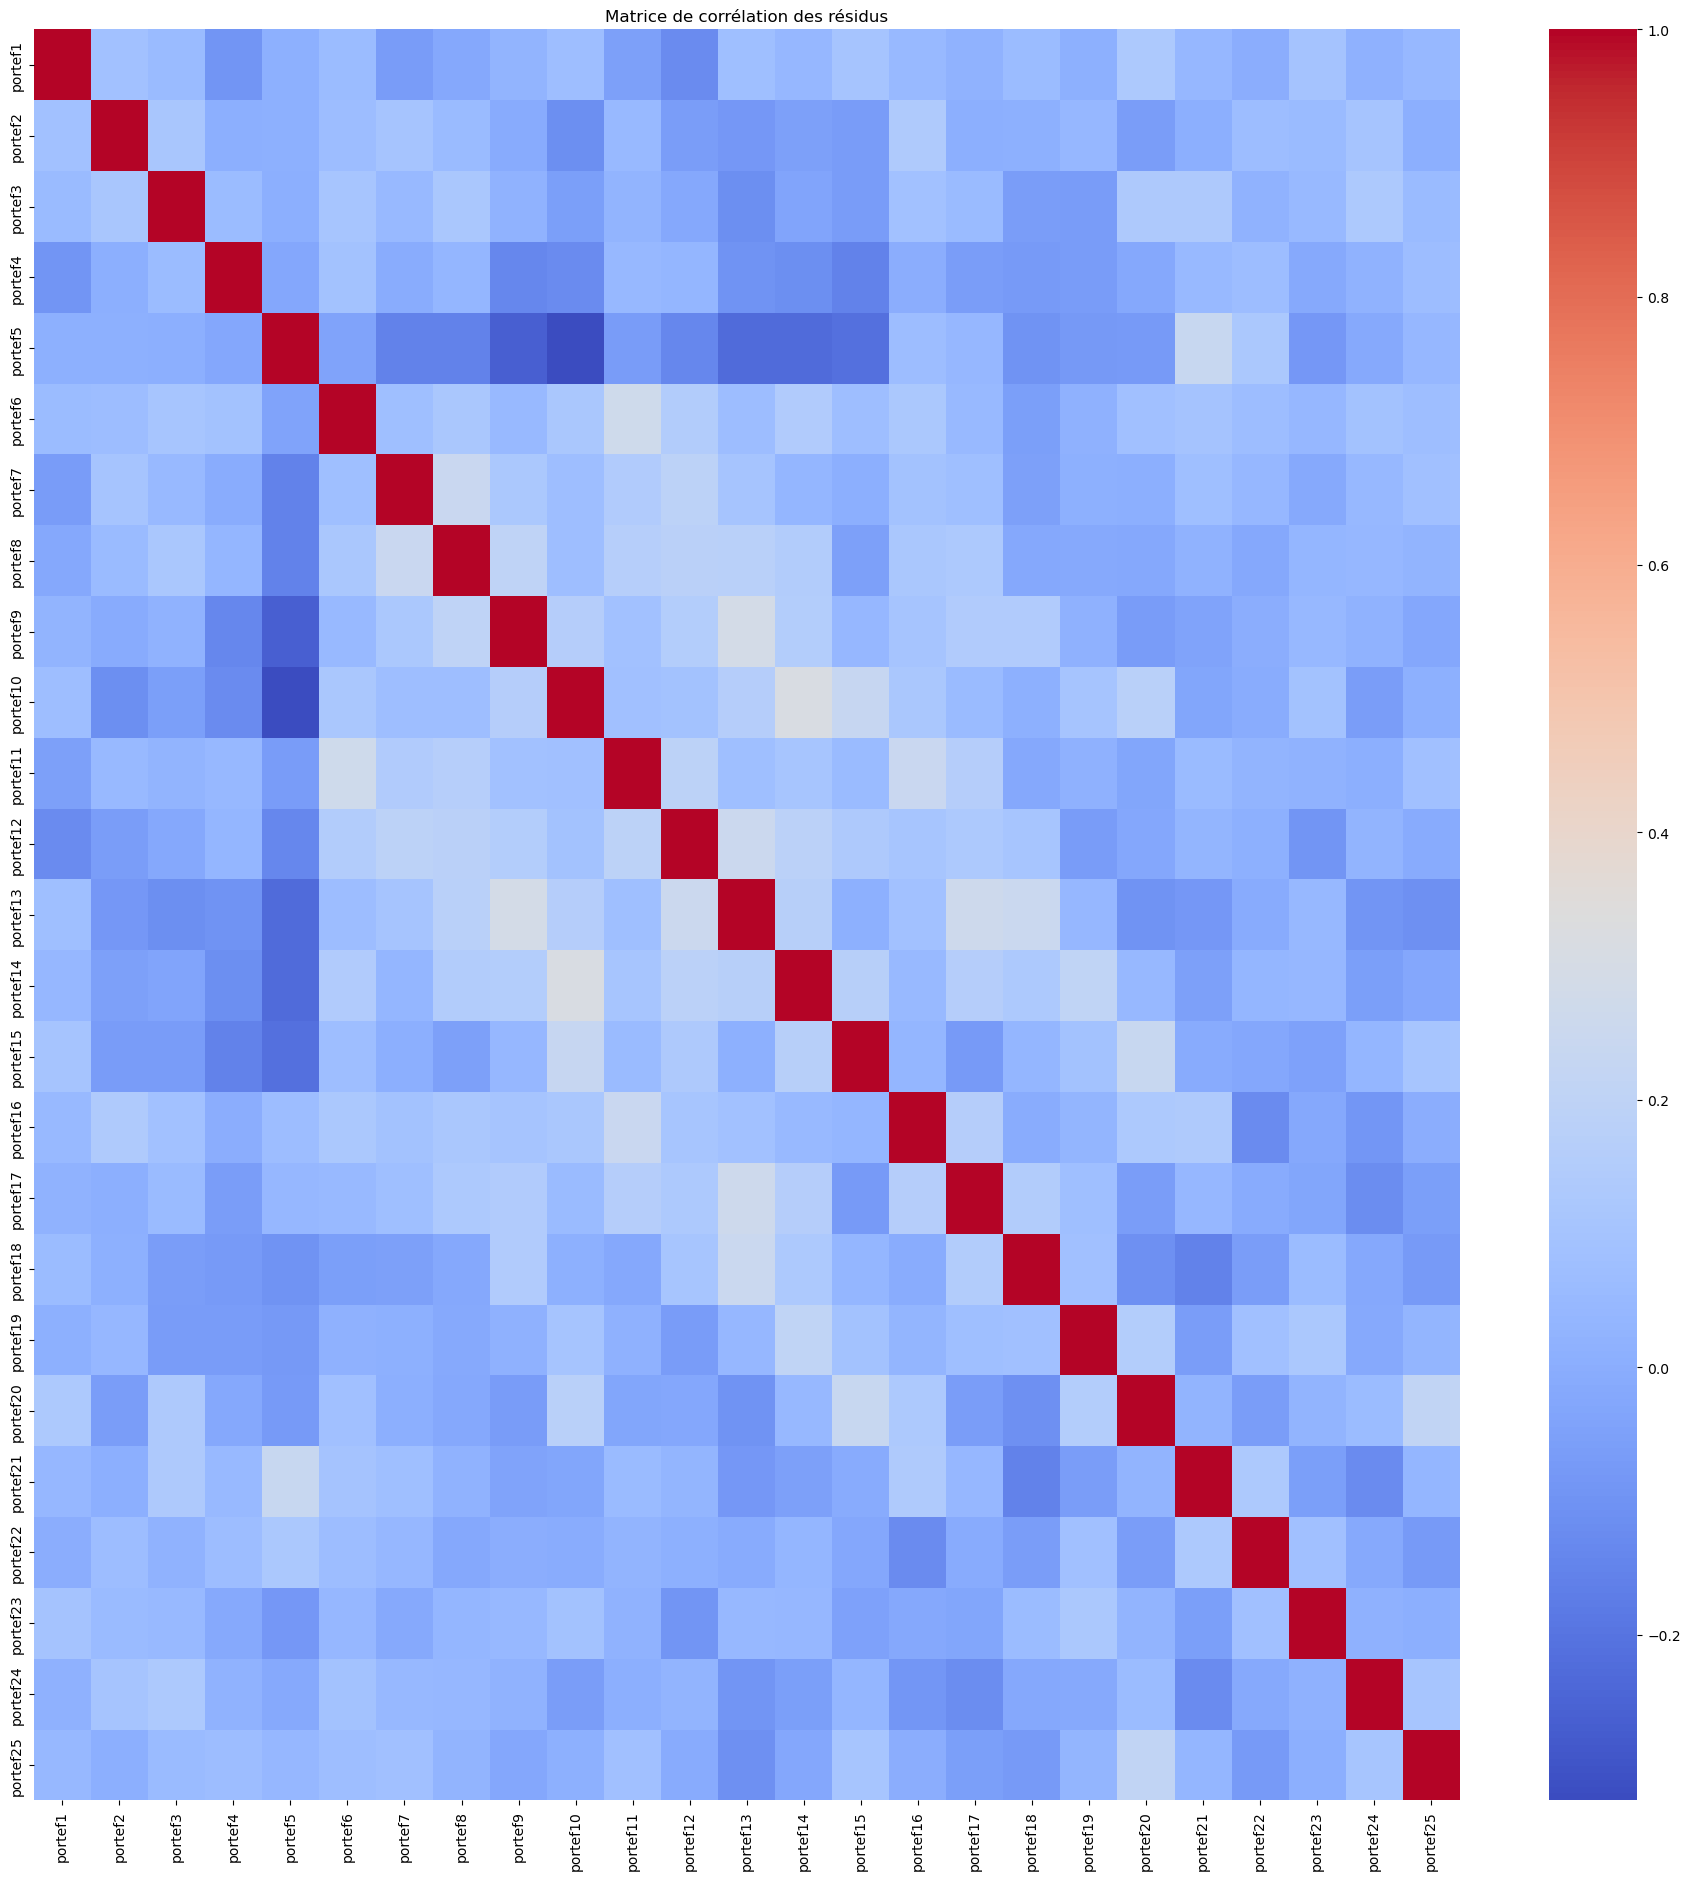

In [227]:
# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(23, 23))
sns.heatmap(matrice_correlation, annot=False, cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des résidus")
plt.show()

**Peut-on supposer que les corrélations des résidus sont nulles en moyenne ?
Que pouvez-vous en déduire sur la capacité des cinq facteurs à expliquer les variations communes des rendements ?**

1. D'après la visualisation de la matrice de corrélation, les valeurs sont globalement proches de zéro. Nous pouvons supposer que les corrélations des résidus sont nulles en moyenne.
Cela signifie que les résidus des régressions ne présentent pas de structure commune significative, indiquant que les rendements inexpliqués par les cinq facteurs sont essentiellement idiosyncratiques.
2. Conséquences pour les cinq facteurs :
Si les corrélations des résidus sont nulles en moyenne, cela indique que les cinq facteurs capturent efficacement les variations communes entre les rendements des actifs. Les cinq facteurs représentent donc bien les sources principales de risque systématique.
Une faible corrélation moyenne des résidus renforce l'idée que le modèle multi-facteurs est bien spécifié et que peu de dépendance non expliquée subsiste entre les actifs.


#### 4. Affichez et commentez les moyennes des $\vert \alpha_{i} \vert$

In [230]:
#4) Présentation et moyennes des constantes des modèles de régressions:
# Extraire les constantes estimées pour les trois régressions
alpha_1 = [abs(resultats[portef]['coefficients_1']['const']) for portef in rendements_portef.columns]
alpha_2 = [abs(resultats[portef]['coefficients_2']['const']) for portef in rendements_portef.columns]
alpha_3 = [abs(resultats[portef]['coefficients_3']['const']) for portef in rendements_portef.columns]

# Moyenne des |alpha_i| pour chaque régression
moyenne_alpha_1 = np.mean(alpha_1)
moyenne_alpha_2 = np.mean(alpha_2)
moyenne_alpha_3 = np.mean(alpha_3)

# Afficher les moyennes
print("Moyennes des constantes :")
print(f"Régression sur le facteur du marché : {moyenne_alpha_1:.3f}")
print(f"Régression sur les 3 facteurs : {moyenne_alpha_2:.3f}")
print(f"Régression sur les 5 facteurs : {moyenne_alpha_3:.3f}")

Moyennes des constantes :
Régression sur le facteur du marché : 0.188
Régression sur les 3 facteurs : 0.272
Régression sur les 5 facteurs : 0.280
